# Neural Networks

### BUSI 520 - Python for Business Research
### Kerry Back, JGSB, Rice University

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Neural networks (multi-layer perceptrons)

* A neural network is a composite function.
* inputs $\rightarrow$ several real-valued functions 
* their outputs into more functions
* etc until outputs $\rightarrow$ single function $\rightarrow$ prediction (for regression)
* for multi-class, a function for each class at the end $\rightarrow$ probabilities (softmax)



* Functions are called neurons.
* Neurons are in "hidden layers" and "output layer"
* Input layer means take in the inputs
* Each neuron takes inputs $x_1, \ldots, x_n$ from the previous layer and computes
$$f\left(b + \sum w_i x_i\right)$$
which is passed to the neurons in the next layer (it is part of the inputs for the next layer).
 

* $b$ is called "bias" and $w_i$ are weights.  $f$ is called "activation function."  
* Same $f$ for all neurons in hidden layers.  Different $b$ and $w_i$.
* $f$ is specified in advance.  Bias and weight coefficients are fit from data.
* Common $f$ is ReLU (rectified linear unit) which just means
$$f\left(b + \sum w_i x_i\right) = \max \left(b + \sum w_i x_i, \;0\right)$$
* For regression, output layer just outputs $b + \sum w_i x_i$.

![](neuralnet.png)

## Noisy Sine Curve Example

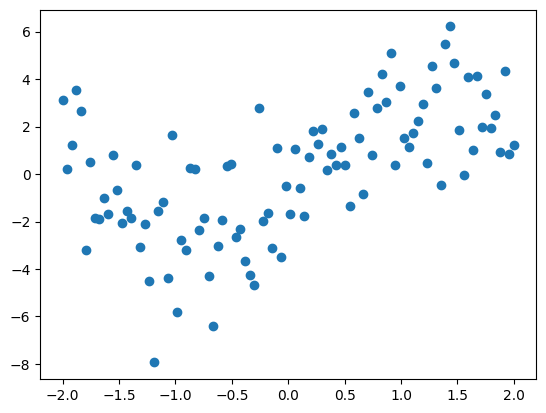

In [2]:
# Generate data

np.random.seed(0)
size = 100

x = np.linspace(-2, 2, size)
y = 2.9 * np.sin(1.5 * x) + 2*np.random.normal(size=size)

# View data
plt.scatter(x, y)
plt.show()

#### Split into train and test

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x.reshape(-1, 1), y, 
    test_size=0.2, 
    random_state=0
)

#### Define a model and train

In [4]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
  hidden_layer_sizes=(16, 8, 4, 2),
  random_state=0,
)
model.fit(X_train, y_train)

c:\Users\kerry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(16, 8, 4, 2), random_state=0)

#### Test

R-squared on test data is 0.0886708545090823


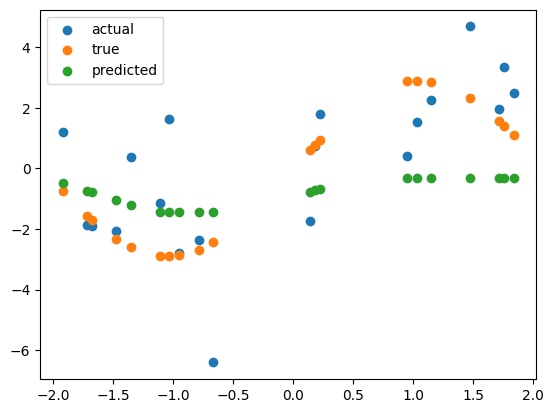

In [5]:
print(f"R-squared on test data is {model.score(X_test, y_test)}")

y_hat = model.predict(X_test)
y_true = 2.9 * np.sin(1.5 * X_test)
plt.scatter(X_test, y_test, label="actual")
plt.scatter(X_test, y_true, label="true")
plt.scatter(X_test, y_hat, label="predicted")
plt.legend()
plt.show()

## Question

How well does the model work if size=10000?

## Irrelevant features example

In [6]:
# Generate 50 features (predictors)
np.random.seed(0)
size = 100

X = pd.DataFrame(
    np.random.normal(size=(size, 50))
)

# Some noise
noise = np.random.normal(size=size)

# Regression target
yr = X[0] + noise

# Binary target
yb = 1*(yr > 0)

# Multi-class target
ym = 1*(yr > -1) + 1*(yr > 1)

#### Split into train and test

In [7]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X, yb, 
    test_size=0.2, 
    random_state=0
)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X, ym, 
    test_size=0.2, 
    random_state=0
)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X, yr, 
    test_size=0.2, 
    random_state=0
)

#### Define a model, train, and test

In [8]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
  hidden_layer_sizes=(16, 8, 4, 2),
  random_state=0
)
model.fit(Xb_train, yb_train)
score_train = model.score(Xb_train, yb_train)
score_test = model.score(Xb_test, yb_test)
print("fraction of correct predictions on training data is", score_train)
print("fraction of correct predictions on test data is", score_test)

fraction of correct predictions on training data is 0.875
fraction of correct predictions on test data is 0.6


c:\Users\kerry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## GridSearchCV

In [9]:
from sklearn.model_selection import GridSearchCV

hidden_layers = [
     (8, 4, 2),
    (8, 4),
    (8, 8),
]
cv = GridSearchCV(
    model,
    param_grid = {"hidden_layer_sizes": hidden_layers},
)
cv.fit(Xb_train, yb_train)
print(f"best hidden layers is {cv.best_params_}")
print(f"score on the test data is {cv.score(Xb_test, yb_test)}")

c:\Users\kerry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kerry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kerry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kerry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

best hidden layers is {'hidden_layer_sizes': (8, 8)}
score on the test data is 0.6


c:\Users\kerry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Overview of fitting a neural network

* A neural network is a composite function.  Let $\theta$ denote all of the bias and weight parameters.  Consider observation $i$ with target $y_i$ and features $x_i$.  Denote the
prediction by $h(x_i, \theta)$.  
* In regression, we want to minimize 
$$ \frac{1}{2} \text{SSE} = \frac{1}{2}\sum_{i=1}^n [y_i - h(x_i, \theta)]^2.$$
* The gradient with respect to $\theta$ is 
$$ \sum_{i=1}^n [y_i - h(x_i, \theta)] \nabla_\theta h(x_i, \theta)$$

#### Composite function

* Simplifying a bit, suppose there is only a single hidden layer with a single neuron. 
* Let $\theta = (\theta_1, \theta_2)$ where $\theta_1$ denotes the parameters of the
hidden layer neuron and $\theta_2$ denotes the parameters of the output layer.
* Let $y_i = f(x_i, \theta_1)$ denote the output of the neuron in the hidden layer.
* Let $z_i$ denote the prediction.  It is generated by the output layer depending on $y_i$.  Denote this dependence by $z_i = g(y_i, \theta_2)$.
* In other words, $h$ is the cmposite function $g \circ f$, meaning
$$h(x_i, \theta) = g(f(x_i, \theta_1), \theta_2)$$


#### Backpropagation

* The gradient of $h$ in $\theta_2$ is
$$\nabla_{\theta_2} h(x_i, \theta) = \nabla_{\theta_2} g(y_i, \theta_2)$$
* The gradient of $h$ in $\theta_1$ is
$$\nabla_{\theta_1} h(x_i, \theta) = \frac{\partial g(y_i, \theta_2)}{\partial y_i}\nabla_{\theta_1} f(x_i, \theta_1)$$
* This type of calculation is called backpropagation.

#### Gradient descent

* In a forward pass, the final output and the outputs of all of the intermediate neurons are calculated as a function of the inputs, given the parameters.
* In the backward pass, the derivatives are calculated.
* Once the overall derivative is known, $\theta$ is adjusted by taking a step in the opposite direction of the gradient (gradient descent).

#### Stochastic gradient descent

* The overall gradient is a sum over all training samples:
$$ \sum_{i=1}^n [y_i - h(x_i, \theta)] \nabla_\theta h(x_i, \theta)$$
* Instead of calculating this, random batches (subsets) are usually drawn without replacement.  
* The sum is calculated over the batch, and a step is taken in the opposite direction of the gradient for that batch.
* Batches are processed until all samples have been used.  This is called an epoch.
* Then a new epoch starts with new random batches.

## Neural net libraries

* Tensorflow from Google
* Torch from Facebook (pytorch = python version)

## Pytorch tensors

In [10]:
import torch

# Creating a tensor from a list
tensor_from_list = torch.tensor([1, 2, 3, 4, 5])

# Creating a tensor from a numpy array
numpy_array = np.array([6, 7, 8, 9, 10])
tensor_from_numpy = torch.from_numpy(numpy_array)

# Creating a 2x3 matrix filled with zeros
zeros_tensor = torch.zeros(2, 3)

# Creating a 2x3 matrix filled with ones
ones_tensor = torch.ones(2, 3)

# Displaying the created tensors
tensor_from_list, tensor_from_numpy, zeros_tensor, ones_tensor

(tensor([1, 2, 3, 4, 5]),
 tensor([ 6,  7,  8,  9, 10], dtype=torch.int32),
 tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]))

## Automatic Differentiation

Automatic differentiation is a key feature in PyTorch that enables the computation of gradients for tensor operations. This is essential for training neural networks using gradient-based optimization algorithms.

In PyTorch, the `autograd` package provides automatic differentiation capabilities. When a tensor has its `requires_grad` attribute set to `True`, any operation performed on that tensor will be tracked, and we can later compute the gradient of that operation with respect to the tensor.

In [11]:
# Creating a tensor and setting requires_grad to True
x = torch.tensor(2.0, requires_grad=True)

# Defining a simple function
y = x ** 2

# Computing the gradient
y.backward()

# Displaying the gradient dy/dx at x = 2
x.grad

tensor(4.)

#### Automatic differentiation of a composite function

In [12]:
x = torch.tensor(2.0, requires_grad=True)

# Defining a simple composite function
y = x ** 2
z = 3 * y

# Computing the gradient
z.backward()

# Displaying the gradient dz/dy * dy/dx at x = 2
x.grad

tensor(12.)

## Pytorch example (sklearn's wine dataset)

In [13]:
# Load the wine dataset
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)
print(f"(numobs, numfeatures) = {X.shape}")
print(f"(unique values of y are {np.unique(y)})")

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(numobs, numfeatures) = (178, 13)
(unique values of y are [0 1 2])


#### Scale the data

Notice that we fit the transform on the training data.  We then apply the fitted transform to the test data.  This is how a scikit-learn pipeline works too.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Convert to tensors

In [15]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

#### Define a network structure

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class WineClassifier(nn.Module):
    def __init__(self):
        super(WineClassifier, self).__init__()  # inherit from nn.Module
        # Define the layers
        self.layer1 = nn.Linear(13, 64)  # Hidden layer 1
        self.layer2 = nn.Linear(64, 32)  # Hidden layer 2
        self.layer3 = nn.Linear(32, 16)  # Hidden layer 3
        self.out = nn.Linear(16, 3)      # Output layer

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.out(x)
        return F.log_softmax(x, dim=1)

In [17]:
# Instantiate the model
model = WineClassifier()
model

WineClassifier(
  (layer1): Linear(in_features=13, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)

#### Define a loss function and optimizer

In [18]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

#### Train

In [19]:
num_epochs = 100
losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    losses.append(loss.item())

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update the parameters
    optimizer.step()

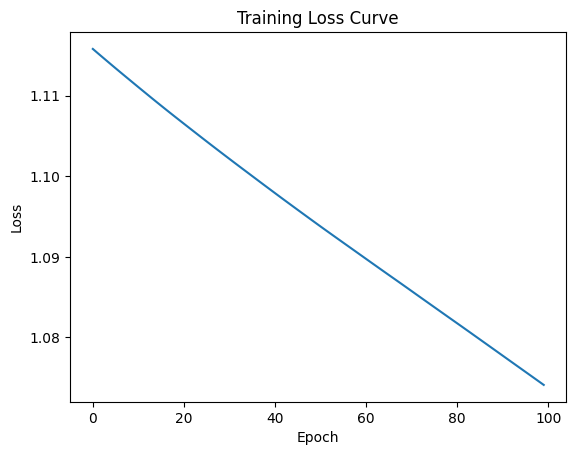

In [20]:
# Plot the loss curve

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

#### Test

In [21]:
logprobs = model(X_test_tensor)
maxlogprob, yhat = torch.max(logprobs, 1) # 1 means max across rows
correct = (yhat == y_test_tensor).sum().item()
accuracy = correct / len(y_test_tensor)
accuracy

0.5555555555555556